<a href="https://colab.research.google.com/github/emilyzhu44/Chocolate-Bar-Data-Analysis-/blob/main/Data_301_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chocolate Bar Analysis

Background Info


- Collected data from Kaggle
- Original data source is from "Flavors of Cacao"
- 2530 observations -> 2487 after dropping nan

#Cleaning Data

In [ ]:
import pandas as pd
import altair as alt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Emilyz44/data301finalproject/main/chocolate.csv")
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [ ]:
#cleaning ingredients list and creating a new columnb for number_of_ingredients

df=df.dropna(subset="ingredients") #dropped all nan

df["ingredients"]=df["ingredients"].str.replace("-",",")
df["ingredients"]=df["ingredients"].str.replace(" ","")
df["ingredients"]=df["ingredients"].str.split(",")
df["number_of_ingredients"]=df["ingredients"].str[0]
df["ingredients"]=df["ingredients"].str[1:]


In [ ]:
#turning ingredients list to dummy variables
ingred_dummies = pd.get_dummies(df["ingredients"].explode()).groupby(level=0).sum()

In [ ]:
#used merge to add the dummies df to the orginal (by index)
df = df.merge(ingred_dummies, right_index=True, left_index=True)
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,number_of_ingredients,B,C,L,S,S*,Sa,V
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"[B, S, C]","rich cocoa, fatty, bready",3.25,3,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"[B, S, C]","cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"[B, S, C]","cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"[B, S, C]","chewy, off, rubbery",3.00,3,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"[B, S, C]","fatty, earthy, moss, nutty,chalky",3.00,3,1,1,0,1,0,0,0


In [ ]:
#renaming ingredients from ingredient abbreviation to actual name
mapping={
    "B": "beans",
    "S": "sugar",
    "S*": "sweetener_other_than_white_cane_or_beet_sugar",
    "C": "cocoa_butter",
    "V": "vanilla",
    "L":"lecithin",
    "Sa":"salt"
}

In [ ]:
#applying map to ingredients variable
df_modified = df["ingredients"].map(lambda x: [mapping[item] for item in x])
df["ingredients"]=df_modified

In [ ]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,number_of_ingredients,B,C,L,S,S*,Sa,V
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"[beans, sugar, cocoa_butter]","rich cocoa, fatty, bready",3.25,3,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"[beans, sugar, cocoa_butter]","cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"[beans, sugar, cocoa_butter]","cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"[beans, sugar, cocoa_butter]","chewy, off, rubbery",3.00,3,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"[beans, sugar, cocoa_butter]","fatty, earthy, moss, nutty,chalky",3.00,3,1,1,0,1,0,0,0


In [ ]:
#rename column names to full ingredients name
df.rename(columns=mapping, inplace = True)

In [ ]:
#turning ingredients from list of str to str
df["ingredients"]=df["ingredients"].apply(lambda x: ', '.join(x))

In [ ]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,number_of_ingredients,beans,cocoa_butter,lecithin,sugar,sweetener_other_than_white_cane_or_beet_sugar,salt,vanilla
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"beans, sugar, cocoa_butter","rich cocoa, fatty, bready",3.25,3,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"beans, sugar, cocoa_butter","cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"beans, sugar, cocoa_butter","cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"beans, sugar, cocoa_butter","chewy, off, rubbery",3.00,3,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"beans, sugar, cocoa_butter","fatty, earthy, moss, nutty,chalky",3.00,3,1,1,0,1,0,0,0


In [ ]:
#mapping of continents
mapping_continents={"Venezuela":"South America",
                    "Peru":"South America",
                    "Ecuador":"South America",
                    "Suriname":"South America",
                    "Colombia":"South America",
                    "Bolivia":"South America",
                    "Brazil":"South America",
                    "Colombia":"South America",
                    "Dominican Republic":"North America",
                    "Costa Rica":"North America",
                    "Trinidad":"North America",
                    "Guatemala":"North America",
                    "Nicaragua":"North America",
                    "Mexico":"North America",
                    "Belize":"North America",
                    "Madagascar":"Africa",
                    "Principe":"Africa",
                    "Tanzania":"Africa",
                    "DR Congo":"Africa",
                    "Ghana":"Africa",
                    "India":"Asia",
                    "U.S.A.":"North America",
                    "Haiti":"North America",
                    "Honduras":"North America",
                    "Cuba":"North America",
                    "Jamaica":"North America",
                    "St. Lucia":"North America",
                    "Puerto Rico":"North America",
                    "El Salvador":"North America",
                    "Tobago":"North America",
                    "Grenada":"North America",
                    "St.Vincent-Grenadines":"North America",
                    "Panama":"North America",
                    "China":"Asia",
                    "Philippines":"Asia",
                    "Sulawesi":"Asia",
                    "Vietnam":"Asia",
                    "Malaysia":"Asia",
                    "Sumatra":"Asia",
                    "Indonesia":"Asia",
                    "Thailand":"Asia",
                    "Blend":"Blend",
                    "Papua New Guinea":"Oceania",
                    "Solomon Islands":"Oceania",
                    "Australia":"Oceania",
                    "Samoa":"Oceania",
                    "Fiji":"Oceania",
                    "Vanuatu":"Oceania",
                    "Uganda":"Africa",
                    "Sao Tome":"Africa",
                    "Ivory Coast":"Africa",
                    "Congo":"Africa",
                    "Sierra Leone":"Africa",
                    "Cameroon":"Africa",
                    "Togo":"Africa",
                    "Liberia":"Africa",
                    "Sao Tome & Principe":"Africa",
                    "Taiwan":"Asia",
                    "Burma":"Asia",
                    "Nigeria":"Africa",
                    "Sri Lanka":"Africa",
                    "Martinique":"Africa",
                    "Gabon":"Africa"
                    }


df["continent_of_bean_origin"]=df["country_of_bean_origin"].map(mapping_continents)

In [ ]:
#Creating dummies for continent
continent_dummies = pd.get_dummies(df["continent_of_bean_origin"])
continent_dummies

,Africa,Asia,Blend,North America,Oceania,South America
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2525,0,0,1,0,0,0
2526,0,0,0,0,0,1
2527,0,0,1,0,0,0
2528,1,0,0,0,0,0


In [ ]:
#Checking for accurate data types
df.dtypes5er

ref                                                int64
company_manufacturer                              object
company_location                                  object
review_date                                        int64
country_of_bean_origin                            object
specific_bean_origin_or_bar_name                  object
cocoa_percent                                     object
ingredients                                       object
most_memorable_characteristics                    object
rating                                           float64
number_of_ingredients                             object
beans                                              uint8
cocoa_butter                                       uint8
lecithin                                           uint8
sugar                                              uint8
sweetener_other_than_white_cane_or_beet_sugar      uint8
salt                                               uint8
vanilla                        

In [ ]:
#changed the number of ingredients into a int dtype
df['number_of_ingredients'] = df['number_of_ingredients'].astype(int)
#changed cocoa_percent to numeric aslo
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%', '').astype(float)

# Q1: Does the bean’s continent of origin have a statistically significant impact on rating?

Box and Whisker plots

In [ ]:
#rating and continent of bean origin
alt.Chart(df).mark_boxplot(extent="min-max").encode(
    alt.X("rating"),
    alt.Y("continent_of_bean_origin", scale=alt.Scale(zero=False)))


alt.Chart(...)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [ ]:
model = ols('rating ~  continent_of_bean_origin', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
continent_of_bean_origin,2.483547,5.0,2.716364,0.018717
Residual,445.625234,2437.0,NaN,NaN


Tukey for continent of bean

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['rating'],
                          groups=df['continent_of_bean_origin'],
                          alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       Africa          Asia  -0.0062    1.0 -0.1198  0.1075  False
       Africa         Blend  -0.1299 0.0257 -0.2503 -0.0095   True
       Africa North America  -0.0028    1.0  -0.081  0.0753  False
       Africa       Oceania   0.0108 0.9999 -0.1312  0.1528  False
       Africa South America   0.0098 0.9991 -0.0663  0.0859  False
         Asia         Blend  -0.1238 0.1089 -0.2619  0.0144  False
         Asia North America   0.0033    1.0 -0.1001  0.1067  False
         Asia       Oceania    0.017 0.9996 -0.1403  0.1743  False
         Asia South America    0.016 0.9977 -0.0859  0.1179  False
        Blend North America   0.1271 0.0138  0.0163  0.2378   True
        Blend       Oceania   0.1407 0.1322 -0.0215   0.303  False
        Blend South America   0.1397 0.0037  0.0304  0.2491   

To summarize:
Blend is significantly different than Africa, North America, and South America in terms of choclate Ratings.
In each of these comparisons, Blend has a higher mean rating than the others.

#Q2: Are certain characteristics more associated with chocolate bars of specific ingredients, bean origins, and ratings?

In [ ]:
len(df["most_memorable_characteristics"].unique())

2403

We decided against pursuing analyzing the characteristics category as there were 2403 unique items.

However, we tried out an analysis of ingredient combinations and number of ingredients on rating.

In [ ]:
df.groupby("ingredients")["rating"].mean().sort_values(ascending=False)

ingredients
beans, sugar, cocoa_butter                                                      3.278529
beans, sugar                                                                    3.229457
beans, sugar, cocoa_butter, lecithin                                            3.213287
beans, sugar, vanilla                                                           3.166667
beans, sugar, cocoa_butter, salt                                                3.150000
beans, sweetener_other_than_white_cane_or_beet_sugar, cocoa_butter, salt        3.112500
beans, sugar, cocoa_butter, vanilla, lecithin                                   3.089674
beans, sweetener_other_than_white_cane_or_beet_sugar, vanilla, lecithin         3.083333
beans, sugar, cocoa_butter, lecithin, salt                                      3.000000
beans, sweetener_other_than_white_cane_or_beet_sugar, cocoa_butter, vanilla     3.000000
beans, cocoa_butter                                                             3.000000
beans, su

Here is the OLS analysis:

In [ ]:
model = ols("rating ~ ingredients", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
ingredients,24.017872,20.0,6.858351,7.151651e-19
Residual,424.090908,2422.0,NaN,NaN


In [ ]:
tukey = pairwise_tukeyhsd(endog=df['rating'],
                          groups=df["ingredients"],
                          alpha=0.05)

tukey.summary()

- bars with **beans, sugar, cocoa_butter, vanilla (4 ingredients)** had a statistically greater rating than:
  - beans and sugar
  - beans, sugar and cocoa butter
  - beans, sugar, cocoa butter and lecithin
- bars with **beans, sugar, cocoa_butter, vanilla, and lecithin (5 ingredients)** had a statistically greater rating than:
  - beans and sugar
  - beans, sugar and cocoa butter
- bars with **beans, sugar, and lecithin (3 ingredients)** had a statistically greater rating than:
  - beans and sugar
  - beans, sugar and cocoa butter
- bars with **beans and sweetener other than white cane or beet sugar (2 ingredients)** had a statistically greater rating than:
  - beans, sugar and cocoa butter


In summary:
- bean, sugar, and cocoa butter had a statistically lower rating than the other in the categories we found significant differences in
- beans and sugar were in 3 of the 4 categories with a statistically lower rating

OLS model of number of ingredients

In [ ]:
model = ols("rating ~ number_of_ingredients", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
number_of_ingredients,4.377233,1.0,24.079483,9.853255e-07
Residual,443.731547,2441.0,NaN,NaN


In [ ]:
tukey = pairwise_tukeyhsd(endog=df['rating'],
                          groups=df["number_of_ingredients"],
                          alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.2597,0.6674,-0.2356,0.7549,False
1,3,0.3105,0.4725,-0.1843,0.8052,False
1,4,0.1696,0.9261,-0.3268,0.666,False
1,5,0.1215,0.9829,-0.3795,0.6225,False
1,6,-0.0208,1.0,-0.8008,0.7591,False
2,3,0.0508,0.1258,-0.0073,0.1089,False
2,4,-0.0901,0.0042,-0.1612,-0.0189,True
2,5,-0.1382,0.0008,-0.2361,-0.0402,True
2,6,-0.2805,0.7737,-0.8863,0.3253,False
3,4,-0.1409,0.0,-0.2083,-0.0735,True


In summary:
- Bars with 4 and 5 ingredients had a statistically greater rating than bars with 2 and 3 ingredients

#Q3: Can the rating of a chocolate be predicted well, using the infomration about it's origin and ingredients?

**Model for predicting Rating (KNeighbors)**

In [ ]:
#Imports for model
from sklearn.neighbors import KNeighborsRegressor  # I think a K-Neighbors model would work better in this scenerio
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
df.columns

Index(['ref', 'company_manufacturer', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'ingredients', 'most_memorable_characteristics',
       'rating', 'number_of_ingredients', 'beans', 'cocoa_butter', 'lecithin',
       'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt',
       'vanilla', 'continent_of_bean_origin'],
      dtype='object')

In [ ]:
X = df[[#'country_of_bean_origin',
        'continent_of_bean_origin',
        'company_manufacturer',
        #'company_location',
        'cocoa_percent',
        'number_of_ingredients',
        'beans', 'cocoa_butter', 'lecithin', 'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt', 'vanilla']]
y = df['rating']

Running a K-Neighbors Model

In [ ]:
#K-Neighbors Regressor
encode = OneHotEncoder(sparse_output=False,
                       handle_unknown='ignore')
scaler = StandardScaler()

ct = make_column_transformer((encode, [#'country_of_bean_origin',
                                       'continent_of_bean_origin',
                                       "company_manufacturer",
                                       #'company_location',
                                       ]
                              ),
                             remainder = "passthrough"
                             )

pipeline = make_pipeline(ct,
                         #scaler,
                         KNeighborsRegressor(n_neighbors = 14)
                         )

pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent_of_bean_origin',
                                                   'company_manufacturer'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=14))])

Training and Test Coefficents of Determination:

In [ ]:
#Training coef of determination
y_ = pipeline.predict(X)
r2_score(y, y_)

0.16451022011857908

In [ ]:
#Test Coef of determination
cross_val_score(pipeline, X, y, scoring='r2').mean()

-0.0387605532182421

Grid Search to Find the Best parameter for K

In [ ]:
#Using 90% to train and %10 to test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=365, test_size=0.10)

In [ ]:
grid = GridSearchCV(pipeline,
                  {'kneighborsregressor__n_neighbors': range(2, 30)},
                  scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['continent_of_bean_origin',
                                                                          'company_manufacturer'])])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor(n_neighbors=14))]),
             param_grid={'kneighborsregressor__n_neighbors': range(2, 30)},
             scoring='r2')

In [ ]:
grid.best_params_, grid.best_score_

({'kneighborsregressor__n_neighbors': 14}, 0.05371369313482135)

Since this model is not that great, we tried to see if Ensemble methods would improve preformance.

**Voting Regressor**


In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
X = df[[#'country_of_bean_origin',
        #'continent_of_bean_origin',
        #'company_manufacturer',
        #'company_location',
        'cocoa_percent',
        'number_of_ingredients',
        'beans', 'cocoa_butter', 'lecithin', 'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt', 'vanilla']]
y = df['rating']

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X=X, y=y)

k_neighbors=KNeighborsRegressor()
k_neighbors.fit(X=X, y=y)

KNeighborsRegressor()

In [ ]:
ensemble_model = VotingRegressor([
    ("linear", linear_model),
    ("knn", k_neighbors)
])
ensemble_model.fit(X=X, y=y)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('knn', KNeighborsRegressor())])

Coefficents of Determination for Voting Method

In [ ]:
y_ = ensemble_model.predict(X)
r2_score(y, y_)

0.04453802830913156

In [ ]:
cross_val_score(ensemble_model, X, y, scoring='r2').mean()

-0.004608377846626132

**Stacking Regressor**




In [ ]:
from sklearn.ensemble import StackingRegressor

stacking_model = StackingRegressor([
    ("linear", linear_model),
    ("knn", k_neighbors)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X=X, y=y)


StackingRegressor(estimators=[('linear', LinearRegression()),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=LinearRegression())

Coefficents of Determination for Stacking Method

In [ ]:
y_ = stacking_model.predict(X)
r2_score(y, y_)

0.052100773800294764

In [ ]:
cross_val_score(stacking_model, X, y, scoring='r2').mean()

0.021330995160120225

Although the Stacking Method did have a positive test coefficent of determination, neither of these ensemble methods are good models.
So, we decided to look at different types of Regression models to see if they would work better.

**Ridge Regression**

In [ ]:
X = df[[#'country_of_bean_origin',
        'continent_of_bean_origin',
        'company_manufacturer',
        #'company_location',
        'cocoa_percent',
        'number_of_ingredients',
        'beans', 'cocoa_butter', 'lecithin', 'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt', 'vanilla']]
y = df['rating']

In [ ]:
from sklearn.linear_model import Ridge

ridge_pipeline = make_pipeline(ct,
                               Ridge(alpha=1.0)
                         )

ridge_pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent_of_bean_origin',
                                                   'company_manufacturer'])])),
                ('ridge', Ridge())])

Coefficents of Determination for Ridge Regressor

In [ ]:
y_ = ridge_pipeline.predict(X)
r2_score(y, y_)

0.41062779690905826

In [ ]:
cross_val_score(ridge_pipeline, X, y, scoring='r2', cv=10).mean()

-0.031115755961708447

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = make_pipeline(ct,
                              DecisionTreeRegressor(random_state=30)
                              )

tree_pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent_of_bean_origin',
                                                   'company_manufacturer'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=30))])

Coefficents of Determination for Decision Tree Regressor

In [ ]:
y_ = tree_pipeline.predict(X)
r2_score(y, y_)

0.8015835494060043

In [ ]:
cross_val_score(tree_pipeline, X, y, scoring='r2', cv=10).mean()

-0.31724584566011876

Both of these new regression models do have relatively high training coefficents of determination, but still suffer from a negative cross validation score.

Thus, we have come to the conclusion that the rating of a choclate bar can not be predicted well, knowing its ingredients and origin information. The rating system may be very subjective, so attempting to predict rating based on objectivity is futile. Another possible explaination is that there is a way to predict ratings, but we would need additional information or variables that just are not available in this dataset. For example, knowing the price of the bars, or price of the individual ingredients, etc. may be much more useful in predicting ratings than just the ingredients and origin themself.

#Visualizations that did not work well

**Distribution of bean origin**

<Axes: >

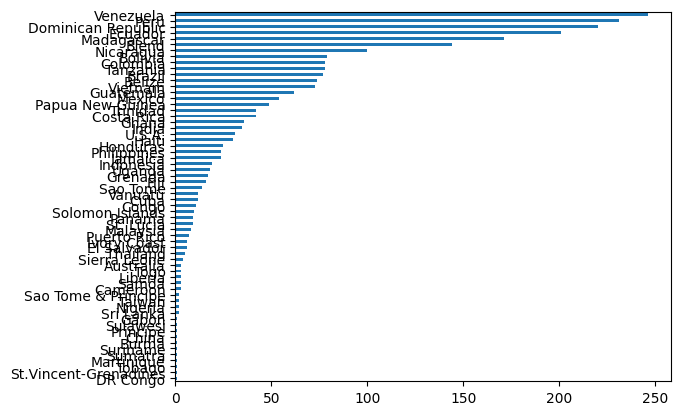

In [ ]:
num_per_origin = df['country_of_bean_origin'].value_counts().sort_values(ascending=True)
num_per_origin.plot.barh()

<Axes: >

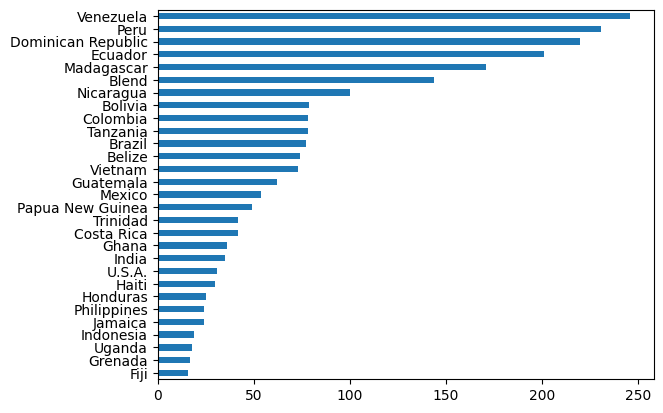

In [ ]:
#Since theres a lot of chart junk, im going to subset
num_per_origin[num_per_origin > 15].plot.barh() #Includes only countries with more than 15 observations.

<Axes: >

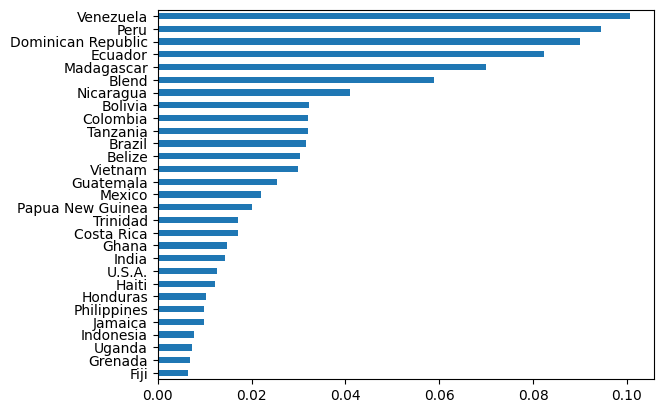

In [ ]:
#Normalized verison:
num_per_origin_norm = df['country_of_bean_origin'].value_counts(normalize=True).sort_values(ascending=True)
num_per_origin_norm[num_per_origin > 15].plot.barh()

<Axes: ylabel='country_of_bean_origin'>

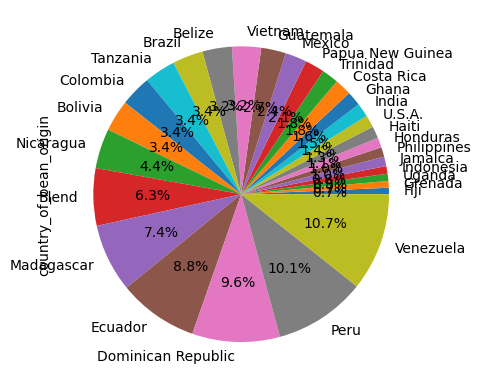

In [ ]:
num_per_origin[num_per_origin > 15].plot.pie(autopct='%1.1f%%')

**Mean Ratings by...**

<Axes: xlabel='company_location'>

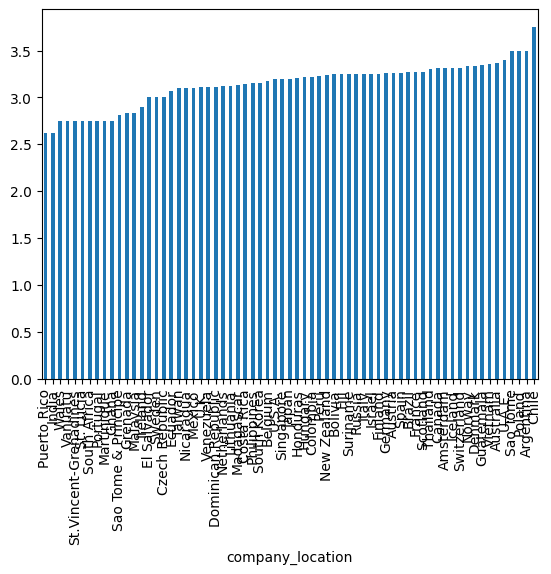

In [ ]:
df.groupby('company_location')['rating'].mean().sort_values(ascending=True).plot.bar()

<Axes: xlabel='country_of_bean_origin'>

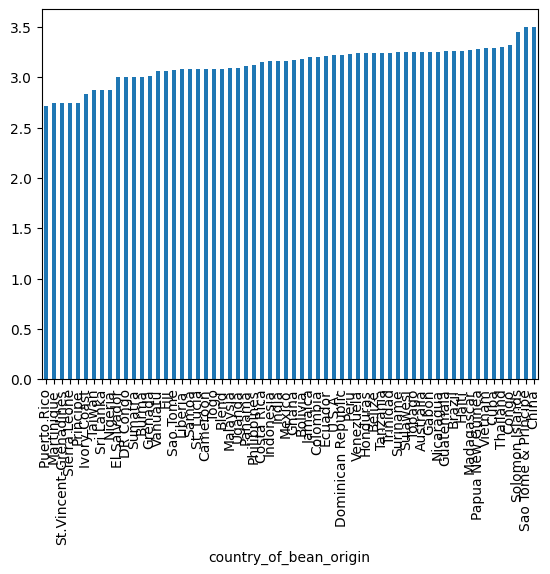

In [ ]:
df.groupby('country_of_bean_origin')['rating'].mean().sort_values(ascending=True).plot.bar()

In [ ]:
alt.Chart(df).mark_point().encode(
    x="cocoa_percent",
    y="rating"
)

alt.Chart(...)

#Visualizations that worked well

<Axes: title={'center': 'Bean Origin'}>

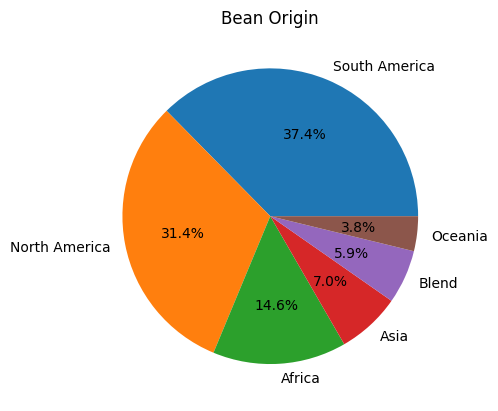

In [ ]:
#continent of bean origin pie chart
df["continent_of_bean_origin"].value_counts().plot.pie(autopct='%1.1f%%',title="Bean Origin",ylabel="")

**Distribution of Company Location**

<Axes: >

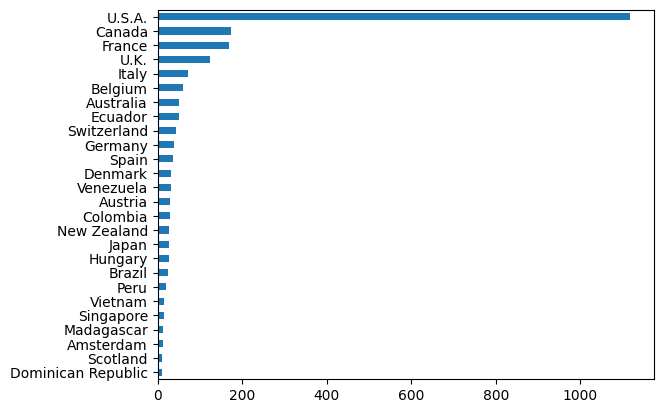

In [ ]:
num_per_company = df['company_location'].value_counts().sort_values(ascending=True)
num_per_company[num_per_company > 10].plot.barh()

<Axes: >

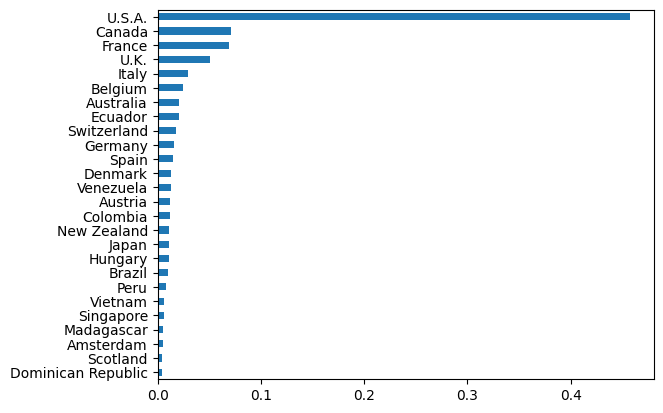

In [ ]:

num_per_company_norm = df['company_location'].value_counts(normalize=True).sort_values(ascending=True)
num_per_company_norm[num_per_company > 10].plot.barh()

In [ ]:
df.groupby("company_manufacturer")["rating"].mean().sort_values(ascending=False)[:5]

company_manufacturer
Ocelot                                  3.875000
Heirloom Cacao Preservation (Zokoko)    3.875000
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Name: rating, dtype: float64

In [ ]:
df["cocoa_percent"].corr(df["rating"])

-0.07717329423244065


#Conclusions

1. Continent of Bean Origin does have a significant effect on rating. The Blends specifically have the highest mean ratings and is noticably different than beans from just North America, South America, and Africa
2. Bean, sugar, and cocoa butter had a statistically lower rating than the other in the categories we found significant differences in. Beans and sugar were in 3 of the 4 categories with a statistically lower rating.
3. Rating can not be predicted well using the variables given about origin and ingredients. The rating system is most likely more subjective than it seems.